# This Program takes Visa/Master card transaction dataset and solve the problem of Fraud Detection:

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import pandas_profiling

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb
import missingno

# Machine Learning
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import linear_model,preprocessing
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import  train_test_split

In [2]:
# Exploratory Data Analysis
df = pd.read_csv("card_transdata.csv")

In [3]:
#Display Top 5 rows
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
#Print Schema
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Plot null data pattern in all columns
missingno.matrix(df, figsize = (30,10))

In [6]:
#Pandas Profiling
pandas_profiling.ProfileReport(df)

C:\Users\v-hapasu\AppData\Local\Continuum\anaconda3\envs\ftk\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,8
Number of observations,1000000
Total Missing (%),0.0%
Total size in memory,61.0 MiB
Average record size in memory,64.0 B
Numeric,3
Categorical,0
Boolean,5
Date,0
Text (Unique),0
Rejected,0


In [7]:
# Function to show missing values in each column

def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    missing_vals_percentage={}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        missing_vals_percentage[column] = round((df_length-total_column_values)/df_length,2)*100
    return missing_vals,missing_vals_percentage

missing_values,missing_vals_percentage = find_missing_values(df, columns=df.columns)
print(missing_values)
print("\nPercentage of missing or NaN values for each column:")
missing_vals_percentage

Number of missing or NaN values for each column:
{'distance_from_home': 0, 'distance_from_last_transaction': 0, 'ratio_to_median_purchase_price': 0, 'repeat_retailer': 0, 'used_chip': 0, 'used_pin_number': 0, 'online_order': 0, 'fraud': 0}

Percentage of missing or NaN values for each column:


{'distance_from_home': 0.0,
 'distance_from_last_transaction': 0.0,
 'ratio_to_median_purchase_price': 0.0,
 'repeat_retailer': 0.0,
 'used_chip': 0.0,
 'used_pin_number': 0.0,
 'online_order': 0.0,
 'fraud': 0.0}

In [8]:
# Creating a crosstab
pd.crosstab(index=df["repeat_retailer"], columns="count")

col_0,count
repeat_retailer,
0.0,118464
1.0,881536


In [9]:
pd.crosstab(index=df["used_chip"], columns="count") 

col_0,count
used_chip,
0.0,649601
1.0,350399


In [10]:
pd.crosstab(index=df["used_pin_number"], columns="count") 

col_0,count
used_pin_number,
0.0,899392
1.0,100608


In [11]:
pd.crosstab(index=df["online_order"], columns="count") 

col_0,count
online_order,
0.0,349448
1.0,650552


In [12]:
pd.crosstab(index=df["fraud"], columns="count") 

col_0,count
fraud,
0.0,912597
1.0,87403


In [13]:
#Correlation Matrix
corrmat = df.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sb.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


In [14]:
# Load Data module
def LoadData(filename, yclasscol, cols, delim=",", normalize=True):
    y_class = [cols[yclasscol]]
    print ("y_class col=", y_class)
    features = cols[0:yclasscol]
    features += cols[yclasscol+1:]
    print ("features col=", features)
    
    df = pd.read_csv(filename, cols, delimiter=delim, delim_whitespace=False)
    df.fillna(value=0,inplace=True)
    x_df = df[features]
    y_df = df[y_class]
    x_data = np.array(pd.DataFrame(x_df, columns = features))
    y_data = np.array(pd.DataFrame(y_df, columns = y_class))
      

    x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=False)
    print (x_data_train.shape)
    return x_data_train, y_data_train, x_data_test, y_data_test
if (__name__ == "__main__"):
    print ("Executing", __name__)
else:
    print ("Importing", __name__)


Executing __main__


In [15]:
# Choose the columns required for Classification
cols = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order","fraud"
]
print (len(cols))
yclasscol = 7
fn = "card_transdata.csv"

# Splitting train and test data using LoadData module
x_train, y_train, x_test, y_test = \
    LoadData(fn, yclasscol=yclasscol, cols=cols, delim=",", normalize=True)
print(x_train,y_train)


8
y_class col= ['fraud']
features col= ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
(800000, 7)
[[57.87785658  0.31114001  1.94593998 ...  1.          0.
   0.        ]
 [10.8299427   0.1755915   1.29421881 ...  0.          0.
   0.        ]
 [ 5.09107949  0.80515259  0.42771456 ...  0.          0.
   1.        ]
 ...
 [ 7.29333654  0.9949192   0.6795783  ...  0.          0.
   1.        ]
 [12.61886867  3.82897591  1.87159267 ...  0.          0.
   1.        ]
 [ 2.10108365 10.51833128  0.53783513 ...  0.          0.
   1.        ]] [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [16]:
# Choose the columns required for Classification
#cols = ["ratio_to_median_purchase_price","fraud"
#]
#print (len(cols))
#yclasscol = 1
#fn = "card_transdata.csv"

# Splitting train and test data using LoadData module
#x_train, y_train, x_test, y_test = \
#    LoadData(fn, yclasscol=yclasscol, cols=cols, delim=",", normalize=True)
#print(x_train,y_train)


In [17]:
# UNIVARIATE ANALYSIS: WHICH FEATURE IMPACTS THE OUTPUT THE MOST, and then select the top
# Find variables that are most likely to impact output:
test = SelectKBest(score_func=f_classif, k=7)
fit = test.fit(x_train, y_train)
newcols = test.get_support(indices=True)
for i in range(7):
    print ("Feature = ",cols[i], ", Univariate Score", fit.scores_[i])

Feature =  distance_from_home , Univariate Score 29240.09024116213
Feature =  distance_from_last_transaction , Univariate Score 6725.830204005158
Feature =  ratio_to_median_purchase_price , Univariate Score 216715.511150545
Feature =  repeat_retailer , Univariate Score 3.089590031652224
Feature =  used_chip , Univariate Score 3009.546178694389
Feature =  used_pin_number , Univariate Score 8158.329635532468
Feature =  online_order , Univariate Score 30671.11168858843


C:\Users\v-hapasu\AppData\Local\Continuum\anaconda3\envs\ftk\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# Choose the columns except "Repeat_Retailer" as this feature is not important as per the Univariate Score
cols = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","used_chip","used_pin_number","online_order","fraud"
]
print (len(cols))
yclasscol = 6
fn = "card_transdata.csv"

# Splitting train and test data using LoadData module
x_train, y_train, x_test, y_test = \
    LoadData(fn, yclasscol=yclasscol, cols=cols, delim=",", normalize=True)
print(x_train,y_train)

7
y_class col= ['fraud']
features col= ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'used_chip', 'used_pin_number', 'online_order']
(800000, 6)
[[57.87785658  0.31114001  1.94593998  1.          0.          0.        ]
 [10.8299427   0.1755915   1.29421881  0.          0.          0.        ]
 [ 5.09107949  0.80515259  0.42771456  0.          0.          1.        ]
 ...
 [ 7.29333654  0.9949192   0.6795783   0.          0.          1.        ]
 [12.61886867  3.82897591  1.87159267  0.          0.          1.        ]
 [ 2.10108365 10.51833128  0.53783513  0.          0.          1.        ]] [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [19]:
# Using a DECISION TREE CLASSIFIER for Fraud detetction
dtmodel = DecisionTreeClassifier(criterion = "gini", splitter = "best")
dtmodel.fit(x_train, y_train)
y_pred_test = dtmodel.predict(x_test)
y_pred_train = dtmodel.predict(x_train)
print ("Test data accuracy", accuracy_score(y_test, y_pred_test))
print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", dtmodel.score(x_train, y_train))
#print("Area under the curve", auc(x_test, y_test))

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test =  confusion_matrix(y_pred_test, y_test)
print ("\nTrain data Confusion Matrix\n", cm_train)
print ("\nTest data Confusion Matrix\n", cm_test)

total=sum(sum(cm_test))
sensitivity1 = cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])
print('\nSensitivity : ', sensitivity1 )

specificity1 = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])
print('Specificity : ', specificity1)

Test data accuracy 0.999995
Train data accuracy 1.0
Train Data score 1.0

Train data Confusion Matrix
 [[730098      0]
 [     0  69902]]

Test data Confusion Matrix
 [[182499      1]
 [     0  17500]]

Sensitivity :  0.9999945205479452
Specificity :  1.0


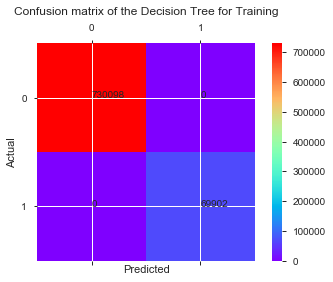

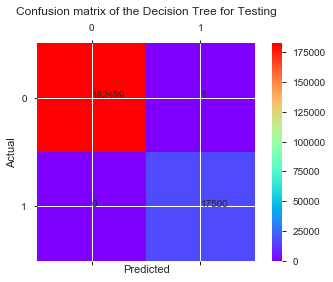

In [20]:
# Confusion matrix of the Decision Tree
import matplotlib.pyplot as plt
%matplotlib inline  

def doPlot(cm, labels, tit):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    c = ax.matshow(cm, cmap=plt.cm.rainbow)
    plt.title('Confusion matrix of the Decision Tree for ' + tit +'\n')
    fig.colorbar(c)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(cm[i][j]))
    plt.show()
    
doPlot(cm_train, ["0","1"], "Training")
doPlot(cm_test, ["0","1"], "Testing")

Decision Tree: ROC AUC=1.000
Precision:  [0.087505 1.       1.      ]
Recall:  [1.         0.99994286 0.        ]


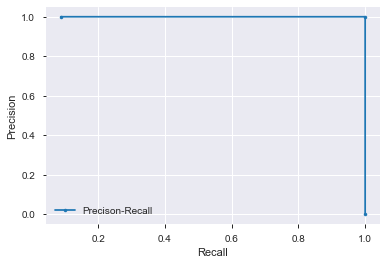

In [21]:
# Plot Area Under Precision Recall Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = dtmodel.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate Precison Recall curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
Precision, Recall, _ = precision_recall_curve(y_test, lr_probs)

print("Precision: ", Precision)
print("Recall: ", Recall)

# plot the roc curve for the model
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
#plt.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
plt.plot(Precision, Recall, marker='.', label='Precison-Recall')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

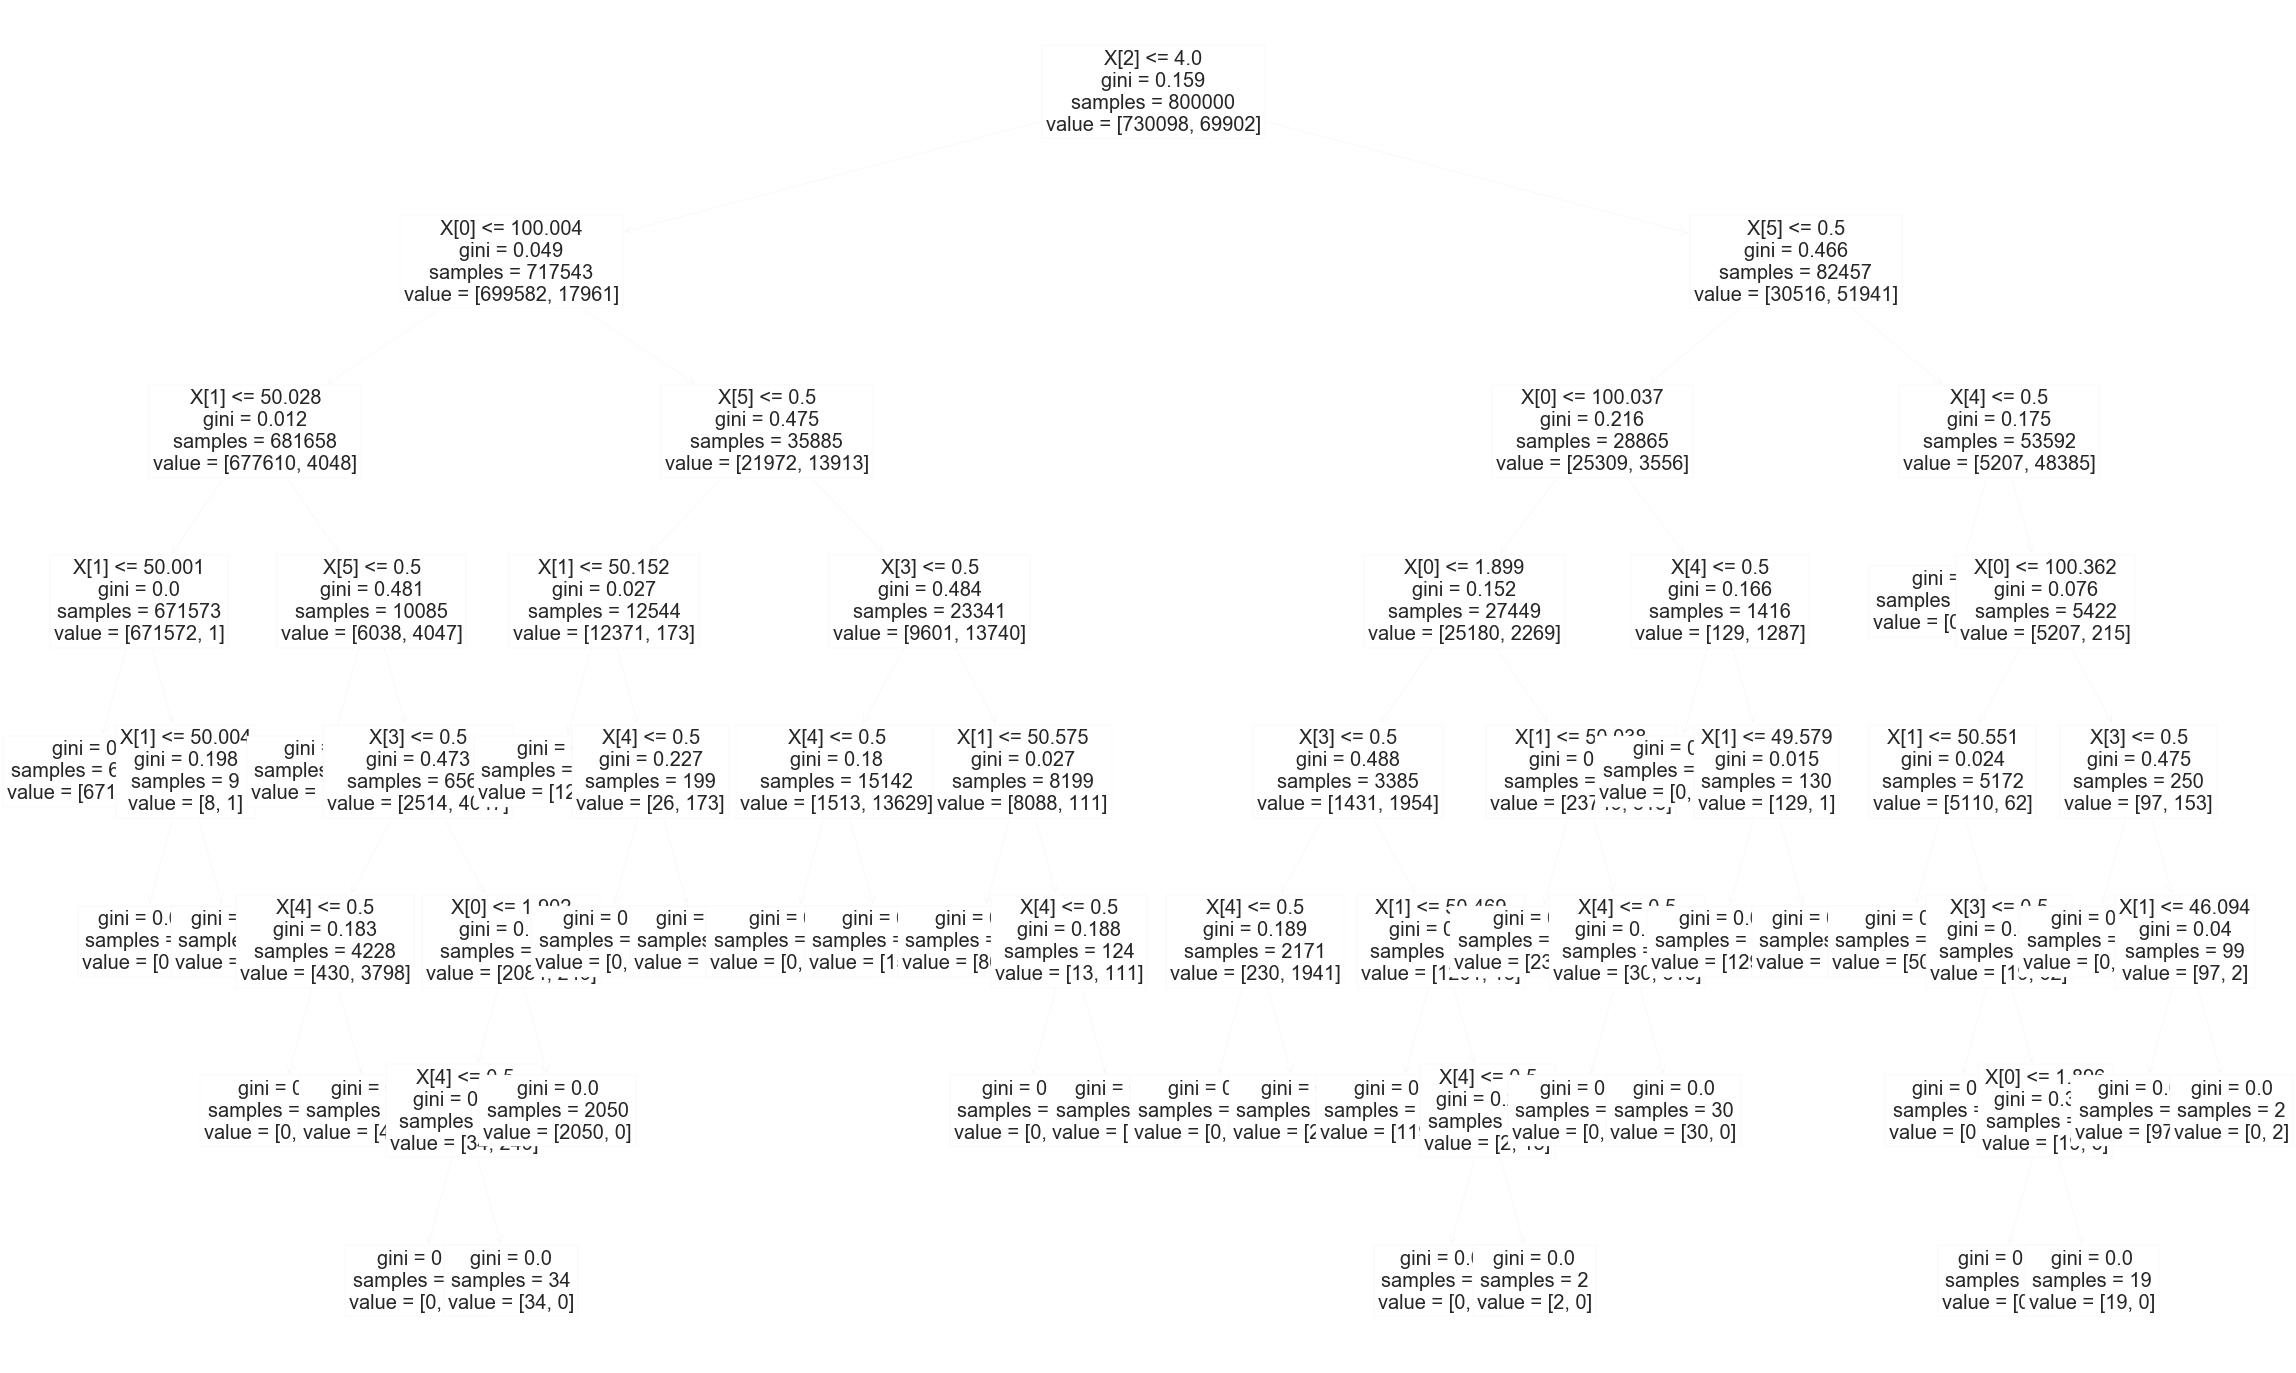

In [22]:
#Display Decision Tree Structure
plt.figure(figsize=[40,25])
tree.plot_tree(dtmodel,fontsize=20)
plt.show()

In [23]:
# Using LOGISTIC REGRESSION for Fraud detetction
lrmodel = LogisticRegression(fit_intercept = True, C = 1e16,  solver = "newton-cg", max_iter=100)
lrmodel.fit(x_train, y_train)
y_pred_test = lrmodel.predict(x_test)
y_pred_train = lrmodel.predict(x_train)
print ("Test data accuracy", accuracy_score(y_test, y_pred_test))
print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", lrmodel.score(x_train, y_train))

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test =  confusion_matrix(y_pred_test, y_test)
print ("\nTrain data Confusion Matrix\n", cm_train)
print ("\nTest data Confusion Matrix\n", cm_test)

total=sum(sum(cm_test))
sensitivity1 = cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])
print('\nSensitivity : ', sensitivity1 )

specificity1 = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])
print('Specificity : ', specificity1)

C:\Users\v-hapasu\AppData\Local\Continuum\anaconda3\envs\ftk\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\v-hapasu\AppData\Local\Continuum\anaconda3\envs\ftk\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\v-hapasu\AppData\Local\Continuum\anaconda3\envs\ftk\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Test data accuracy 0.9585
Train data accuracy 0.95866
Train Data score 0.95866

Train data Confusion Matrix
 [[724990  27964]
 [  5108  41938]]

Test data Confusion Matrix
 [[181213   7014]
 [  1286  10487]]

Sensitivity :  0.9627364830762856
Specificity :  0.8907670092584727


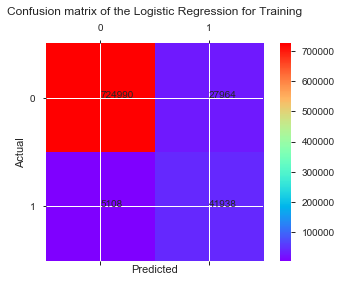

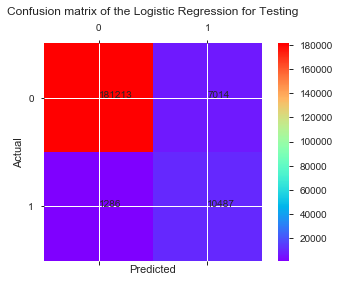

In [24]:
# Confusion matrix of the Logistic Regression
import matplotlib.pyplot as plt
%matplotlib inline  

def doPlot(cm, labels, tit):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    c = ax.matshow(cm, cmap=plt.cm.rainbow)
    plt.title('Confusion matrix of the Logistic Regression for ' + tit +'\n')
    fig.colorbar(c)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(cm[i][j]))
    plt.show()
    
doPlot(cm_train, ["0","1"], "Training")
doPlot(cm_test, ["0","1"], "Testing")

Decision Tree: ROC AUC=0.966
Precision:  [0.09673443 0.09672944 0.09672997 ... 0.76190476 0.73684211 1.        ]
Recall:  [1.         0.99994286 0.99994286 ... 0.00182847 0.00159991 0.        ]


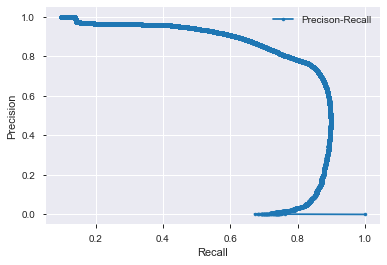

In [25]:
# Plot Area Under Precision Recall Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = lrmodel.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate Precison Recall curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
Precision, Recall, _ = precision_recall_curve(y_test, lr_probs)

print("Precision: ", Precision)
print("Recall: ", Recall)

# plot the roc curve for the model
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
#plt.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
plt.plot(Precision, Recall, marker='.', label='Precison-Recall')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [26]:
# Using RANDOM FOREST CLASSIFIER for Fraud detetction
rfmodel = RandomForestClassifier(n_estimators = 100, random_state = 21)
rfmodel.fit(x_train, y_train)
y_pred_test = rfmodel.predict(x_test)
y_pred_train = rfmodel.predict(x_train)
print ("Test data accuracy", accuracy_score(y_test, y_pred_test))
print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", rfmodel.score(x_train, y_train))
#print("Area under the curve", auc(x_test, y_test))

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test =  confusion_matrix(y_pred_test, y_test)
print ("\nTrain data Confusion Matrix\n", cm_train)
print ("\nTest data Confusion Matrix\n", cm_test)

total=sum(sum(cm_test))
sensitivity1 = cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])
print('\nSensitivity : ', sensitivity1 )

specificity1 = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])
print('Specificity : ', specificity1)

C:\Users\v-hapasu\AppData\Local\Continuum\anaconda3\envs\ftk\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Test data accuracy 0.99999
Train data accuracy 1.0
Train Data score 1.0

Train data Confusion Matrix
 [[730098      0]
 [     0  69902]]

Test data Confusion Matrix
 [[182499      2]
 [     0  17499]]

Sensitivity :  0.9999890411559389
Specificity :  1.0


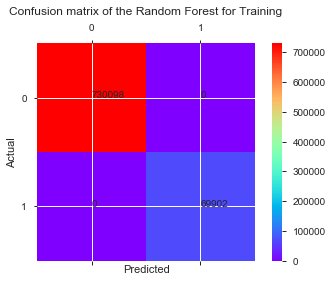

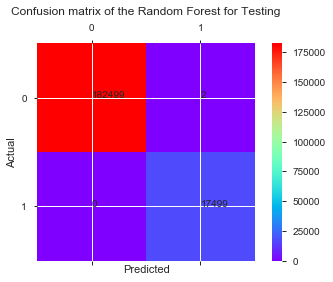

In [27]:
# Confusion matrix of the RANDOM FOREST CLASSIFIER
import matplotlib.pyplot as plt
%matplotlib inline  

def doPlot(cm, labels, tit):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    c = ax.matshow(cm, cmap=plt.cm.rainbow)
    plt.title('Confusion matrix of the Random Forest for ' + tit +'\n')
    fig.colorbar(c)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(cm[i][j]))
    plt.show()
    
doPlot(cm_train, ["0","1"], "Training")
doPlot(cm_test, ["0","1"], "Testing")

Decision Tree: ROC AUC=1.000
Precision:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Recall:  [1.         0.99994286 0.99988572 0.99982858 0.99977144 0.9997143
 0.99965716 0.99960002 0.99954288 0.99948574 0.9994286  0.99931432
 0.99920005 0.99902863 0.99897149 0.99880007 0.99862865 0.99851437
 0.99840009 0.99828581 0.99817153 0.99794297 0.99777156 0.99731444
 0.99651448 0.99468602 0.9912005  0.98314382 0.94474601 0.        ]


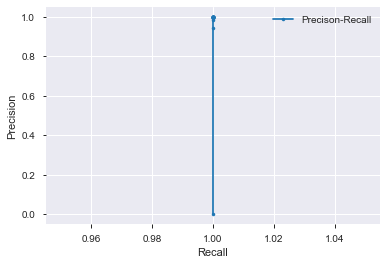

In [28]:
# Plot Area Under Precision Recall Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
rf_probs = rfmodel.predict_proba(x_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (rf_auc))
# calculate Precison Recall curves
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
Precision, Recall, _ = precision_recall_curve(y_test, rf_probs)

print("Precision: ", Precision)
print("Recall: ", Recall)

# plot the roc curve for the model
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
#plt.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
plt.plot(Precision, Recall, marker='.', label='Precison-Recall')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [29]:
# Using NAIVE BAYES for Fraud detetction
nbmodel = GaussianNB()
nbmodel.fit(x_train, y_train)
y_pred_test = nbmodel.predict(x_test)
y_pred_train = nbmodel.predict(x_train)
print ("Test data accuracy", accuracy_score(y_test, y_pred_test))
print ("Train data accuracy", accuracy_score(y_train, y_pred_train))
print ("Train Data score", nbmodel.score(x_train, y_train))
#print("Area under the curve", auc(x_test, y_test))

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test =  confusion_matrix(y_pred_test, y_test)
print ("\nTrain data Confusion Matrix\n", cm_train)
print ("\nTest data Confusion Matrix\n", cm_test)

total=sum(sum(cm_test))
sensitivity1 = cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])
print('\nSensitivity : ', sensitivity1 )

specificity1 = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])
print('Specificity : ', specificity1)

C:\Users\v-hapasu\AppData\Local\Continuum\anaconda3\envs\ftk\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test data accuracy 0.950305
Train data accuracy 0.9505125
Train Data score 0.9505125

Train data Confusion Matrix
 [[718909  28401]
 [ 11189  41501]]

Test data Confusion Matrix
 [[179688   7128]
 [  2811  10373]]

Sensitivity :  0.9618448098663926
Specificity :  0.7867870145631068


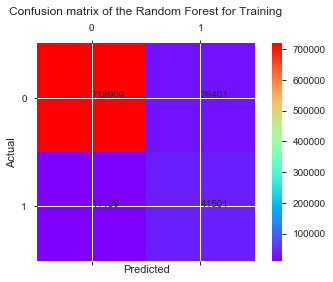

In [30]:
# Confusion matrix of the Naive Bayes Model
import matplotlib.pyplot as plt
%matplotlib inline  

def doPlot(cm, labels, tit):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    c = ax.matshow(cm, cmap=plt.cm.rainbow)
    plt.title('Confusion matrix of the Random Forest for ' + tit +'\n')
    fig.colorbar(c)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(cm[i][j]))
    plt.show()
    
doPlot(cm_train, ["0","1"], "Training")

Decision Tree: ROC AUC=0.964
Precision:  [0.09645507 0.09645009 0.09645062 ... 0.6231454  0.62258544 1.        ]
Recall:  [1.         0.99994286 0.99994286 ... 0.04799726 0.04788298 0.        ]


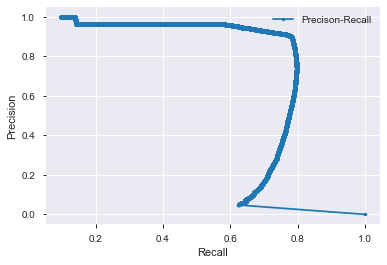

In [31]:
# Plot Area Under Precision Recall Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
nb_probs = nbmodel.predict_proba(x_test)
# keep probabilities for the positive outcome only
nb_probs = nb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (nb_auc))
# calculate Precison Recall curves
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
Precision, Recall, _ = precision_recall_curve(y_test, nb_probs)

print("Precision: ", Precision)
print("Recall: ", Recall)

# plot the roc curve for the model
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
#plt.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
plt.plot(Precision, Recall, marker='.', label='Precison-Recall')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()